In [51]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

#ensures plots are rendered correctly in Jupyter Notebooks
%matplotlib inline 

## Exploratory Data Analysis of Car Prices

In [89]:
df = pd.read_csv('data.csv')

In [90]:
#get number of rows in dataset
len(df)

11914

In [91]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [92]:
#Lower case all the column names and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

#select columns 
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [93]:
#result of dataframe preprocessing is that the column names and values are normalized
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Understand what our target variable looks like ... 

<AxesSubplot: xlabel='msrp', ylabel='Count'>

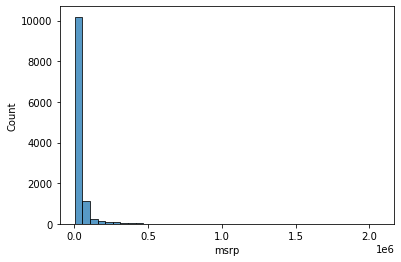

In [94]:
sns.histplot(df.msrp, bins = 40)

notice in graph above there is a large skew to the distribution
right tail skewed 

<AxesSubplot: xlabel='msrp', ylabel='Count'>

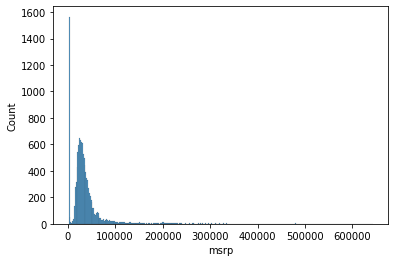

In [95]:
# look at cars below $1000000
sns.histplot(df.msrp[df.msrp < 1000000])

Notice that the distribution of prices appears to have a more 'normal' distribution after looking at car prices below 1,000,000 dollars. The long tail can greatly confuse the model. 

To solve this problem we will log transform the prices (i.e. our target variable)

<AxesSubplot: xlabel='msrp', ylabel='Count'>

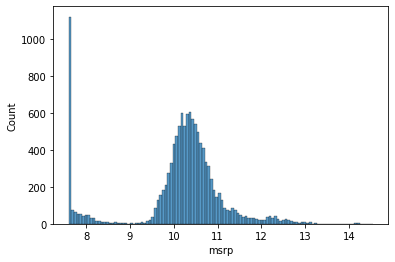

In [96]:
log_price = np.log1p(df.msrp)

sns.histplot(log_price)

The transformation remvoes the long tail and now the distribution resembles a bell shapped curve

Note: a target distribution that looks like a normal distribution perform well with linear regression models!

## Checking for missing values

In [97]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We need to deal with missing values later when we train the model 

Note: it is good that we are not missing any data for the target variable

## Validation Framework

In [99]:
n = len(df)

#calculate the number of rows should go into train, validation, and test
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(83)

idx = np.arange(n)

#create an array with idicies from 0 to n-1 and suffle it
np.random.shuffle(idx) 

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [100]:
#initial analysis showed a long tail in the distribution of of prices, and to remove that effect
# we applied added +1 and a log transformation

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

#remove target variable to prevent training the model using the target

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [63]:
def train_linear_regression(X,y):
    """develop a linear regression function using numpy mathematical functions
    """
    
    #adding a dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


    

## Base Solution

In [101]:
#create a training set of only numerical features 
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_num = df_train[base]

In [102]:
#fill missing values 
df_num = df_num.fillna(0)

In [103]:
#convert data to NumpyArray
X_train = df_num.values


In [104]:
w_0, w = train_linear_regression(X_train, y_train)

In [105]:
y_pred = w_0 + X_train.dot(w)

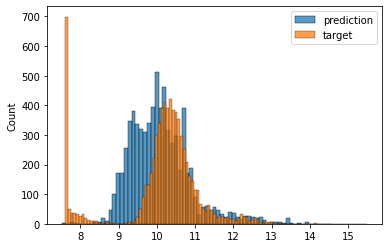

In [106]:
#compare preditions to actual prices
sns.histplot(y_pred, label = 'prediction')
sns.histplot(y_train, label = 'target')
plt.legend()

we can see the predictions aren't very good 

In [107]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [108]:
#evaluate quality of the model ("the lower the MSE the better")
rmse(y_train, y_pred)

0.7528553541280764

## Validating the Model

In [109]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [110]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

x_val = prepare_X(df_val)
y_pred = w_0 + x_val.dot(w)
print(f"Validation:{rmse(y_val, y_pred)}")

Validation:0.791983694876181


In [111]:
#our validation set

## Simple Feature Engineering

In [112]:
#determine max year of car
df_train.year.max()

2017

In [127]:
##subtract max year as an element wise operation
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


    

In [131]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)


X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print(f"validation: {rmse(y_val, y_pred)}")


validation: 0.5114851908926686


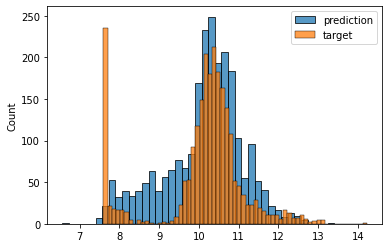

In [134]:
sns.histplot(y_pred, label = 'prediction')
sns.histplot(y_val, label = 'target')
plt.legend()

## Handling Catagorical Variables

In [155]:
#one-hot encode catagorical variables
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        feature = 'num_doors_%s' % v
        value = (df['number_of_doors'] == v).astype(int)
        df[feature] = value
        features.append(feature)
        
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)',
             'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    
    #onehot encode more features!
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [156]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print(f"validation: {rmse(y_val, y_pred)}")


validation: 0.5060734088788502
